## Use Spark to explore data

In [4]:
%%pyspark

df = spark.read.load('abfss://files@datalakecy82nb5.dfs.core.windows.net/sales/orders/2019.csv', format='csv'
## If header exists uncomment line below
##, header=True
)

display(df.limit(10))

StatementMeta(sparkcy82nb5, 0, 5, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 39353ab0-86ea-4346-a63e-81d64f77d2e8)

In [5]:

 %%pyspark
 
 df = spark.read.load('abfss://files@datalakecy82nb5.dfs.core.windows.net/sales/orders/*.csv', format='csv'
 )
 display(df.limit(100))

StatementMeta(sparkcy82nb5, 0, 6, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 657fd585-b74d-4663-8a01-45eafa53554a)

In [6]:
 %%pyspark

 from pyspark.sql.types import *
 from pyspark.sql.functions import *

 orderSchema = StructType([
     StructField("SalesOrderNumber", StringType()),
     StructField("SalesOrderLineNumber", IntegerType()),
     StructField("OrderDate", DateType()),
     StructField("CustomerName", StringType()),
     StructField("Email", StringType()),
     StructField("Item", StringType()),
     StructField("Quantity", IntegerType()),
     StructField("UnitPrice", FloatType()),
     StructField("Tax", FloatType())
     ])

 df = spark.read.load('abfss://files@datalakecy82nb5.dfs.core.windows.net/sales/orders/*.csv', format='csv', schema=orderSchema)
 display(df.limit(100))

StatementMeta(sparkcy82nb5, 0, 7, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 24ba4b03-53c5-4220-82d4-4f709b47a236)

In [9]:

df.printSchema()

StatementMeta(sparkcy82nb5, 0, 9, Finished, Available, Finished)

root
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- OrderDate: date (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- Item: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- UnitPrice: float (nullable = true)
 |-- Tax: float (nullable = true)



In [13]:
 customers = df['CustomerName', 'Email']
 
 print("output 1",customers.count())
 print("output 2",customers.distinct().count())

 display(customers.distinct())

StatementMeta(sparkcy82nb5, 0, 13, Finished, Available, Finished)

output 1 32718
output 2 12427


SynapseWidget(Synapse.DataFrame, 17679092-2128-4de3-995d-5b63194426e5)

In [14]:
 customers = df.select("CustomerName", "Email").where(df['Item']=='Road-250 Red, 52')
 print(customers.count())
 print(customers.distinct().count())
 display(customers.distinct())


StatementMeta(sparkcy82nb5, 0, 14, Finished, Available, Finished)

133
133


SynapseWidget(Synapse.DataFrame, 1ceff5f0-331d-42ab-b8f1-1ab0fbfb7c25)


#### Aggregate and group data in a datafram

In [15]:

 productSales = df.select("Item", "Quantity").groupBy("Item").sum()
 display(productSales)


StatementMeta(sparkcy82nb5, 0, 15, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 29e07c93-78f9-4dda-abde-df2f643d4abd)

In [16]:
 yearlySales = df.select(year("OrderDate").alias("Year")).groupBy("Year").count().orderBy("Year")
 display(yearlySales)

StatementMeta(sparkcy82nb5, 0, 16, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 9e3a3d35-ebf5-4f6f-aa2a-01909216427b)

## Query data using Spark SQL

### Use Spark SQL in PySpark code

In [17]:
 df.createOrReplaceTempView("salesorders")

 spark_df = spark.sql("SELECT * FROM salesorders")
 
 display(spark_df)

StatementMeta(sparkcy82nb5, 0, 19, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 92360e66-c6e0-4f5b-8ff0-ed68778d778e)

### Run SQL code in a cell

In [18]:
 %%sql
 
 SELECT YEAR(OrderDate) AS OrderYear,
        SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue
 FROM salesorders
 GROUP BY YEAR(OrderDate)
 ORDER BY OrderYear;

StatementMeta(sparkcy82nb5, 0, 20, Finished, Available, Finished)

<Spark SQL result set with 3 rows and 2 fields>

### Visualize data with Spark

#### View results as a chart

In [19]:
 %%sql
 
 SELECT * FROM salesorders

StatementMeta(sparkcy82nb5, 0, 21, Finished, Available, Finished)

<Spark SQL result set with 1000 rows and 9 fields>

#### Get started with matplotlib

In [20]:
 sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                 SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue \
             FROM salesorders \
             GROUP BY CAST(YEAR(OrderDate) AS CH4AR()) \
             ORDER BY OrderYear"
 df_spark = spark.sql(sqlQuery)
 df_spark.show()

StatementMeta(sparkcy82nb5, 0, 22, Finished, Available, Finished)

+---------+--------------------+
|OrderYear|        GrossRevenue|
+---------+--------------------+
|     2019|   4172169.969970703|
|     2020|   6882259.268127441|
|     2021|1.1547835291696548E7|
+---------+--------------------+



StatementMeta(sparkcy82nb5, 0, 24, Finished, Available, Finished)

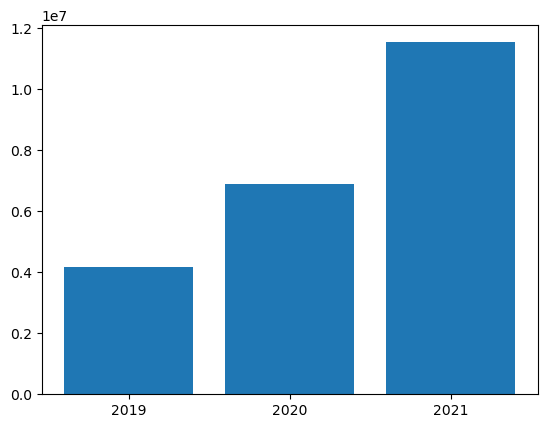

In [22]:
 from matplotlib import pyplot as plt

 # matplotlib requires a Pandas dataframe, not a Spark one
 df_sales = df_spark.toPandas()

 # Create a bar plot of revenue by year
 plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])


 # Display the plot
 plt.show()

StatementMeta(sparkcy82nb5, 0, 30, Finished, Available, Finished)

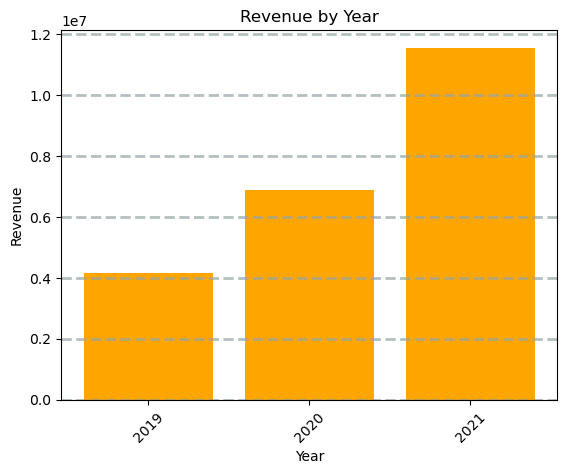

In [28]:
 # Clear the plot area
 plt.clf()

 # Create a bar plot of revenue by year
 plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

 # Customize the chart
 plt.title('Revenue by Year')
 plt.xlabel('Year')
 plt.ylabel('Revenue')
 plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
 plt.xticks(rotation=45)

 # Show the figure
 plt.show()

StatementMeta(sparkcy82nb5, 0, 31, Finished, Available, Finished)

<Figure size 640x480 with 0 Axes>

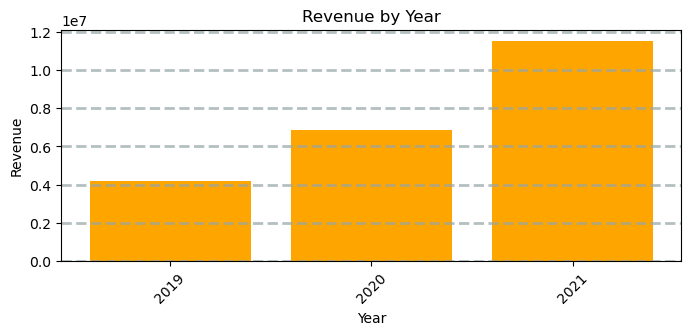

In [29]:
 # Clear the plot area
 plt.clf()

 # Create a Figure
 fig = plt.figure(figsize=(8,3))

 # Create a bar plot of revenue by year
 plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

 # Customize the chart
 plt.title('Revenue by Year')
 plt.xlabel('Year')
 plt.ylabel('Revenue')
 plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
 plt.xticks(rotation=45)

 # Show the figure
 plt.show()

StatementMeta(sparkcy82nb5, 0, 33, Finished, Available, Finished)

<Figure size 640x480 with 0 Axes>

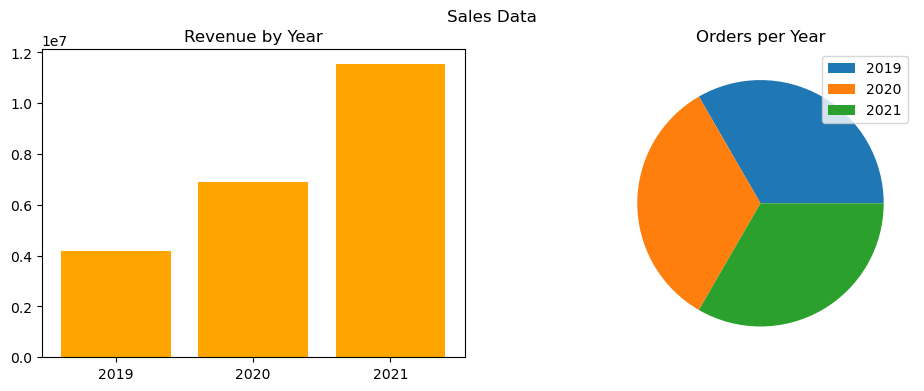

In [31]:
 # Clear the plot area
 
 plt.clf()

 # Create a figure for 2 subplots (1 row, 2 columns)
 fig, ax = plt.subplots(1, 2, figsize = (12,4))

 # Create a bar plot of revenue by year on the first axis
 ax[0].bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
 ax[0].set_title('Revenue by Year')

 # Create a pie chart of yearly order counts on the second axis
 yearly_counts = df_sales['OrderYear'].value_counts()
 ax[1].pie(yearly_counts)
 ax[1].set_title('Orders per Year')
 ax[1].legend(yearly_counts.keys().tolist())

 # Add a title to the Figure
 fig.suptitle('Sales Data')

 # Show the figure
 plt.show()

#### Use the seaborn library

StatementMeta(sparkcy82nb5, 0, 34, Finished, Available, Finished)

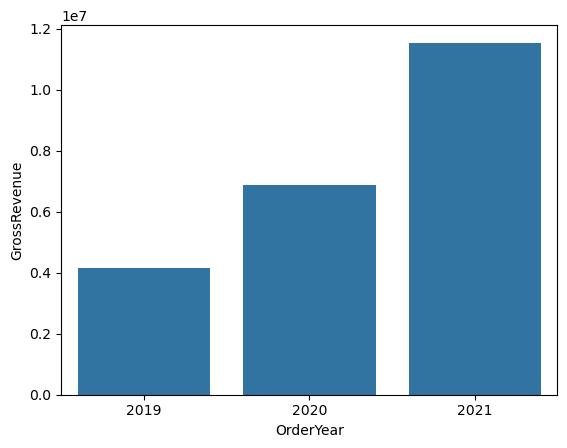

In [32]:
 import seaborn as sns

 # Clear the plot area
 plt.clf()

 # Create a bar chart
 ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
 plt.show()

StatementMeta(sparkcy82nb5, 0, 36, Finished, Available, Finished)

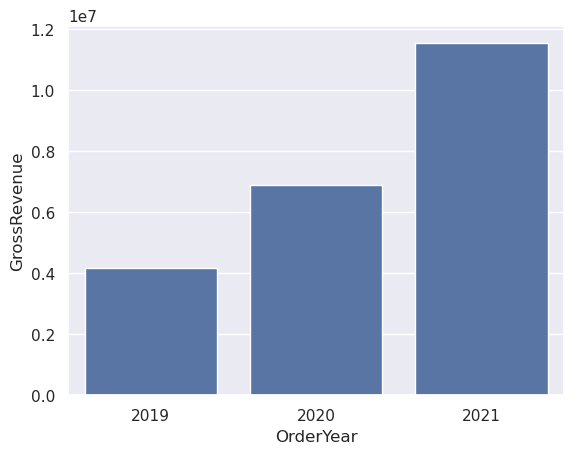

In [34]:
 # Clear the plot area
 plt.clf()

 # Set the visual theme for seaborn
 sns.set_theme(style="darkgrid")

 # Create a bar chart
 ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
 plt.show()

StatementMeta(sparkcy82nb5, 0, 37, Finished, Available, Finished)

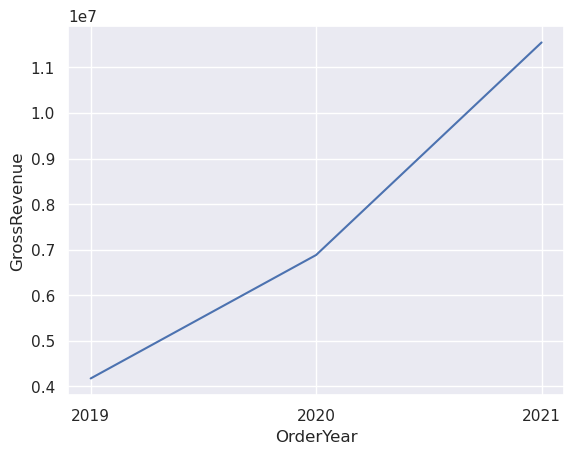

In [35]:
 # Clear the plot area
 plt.clf()

 # Create a bar chart
 ax = sns.lineplot(x="OrderYear", y="GrossRevenue", data=df_sales)
 plt.show()